<a href="https://colab.research.google.com/github/nfSharmagit/LangChain-Streamlit-Apps/blob/main/LangChain_OpenAI_Anime_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LangChain has emerged as one of the most pragmatic frameworks for building LLM-powered applications that actually ship to production

**Streamlit**

Streamlit is an open-source Python framework for data scientists and AI/ML engineers to deliver dynamic data apps with only a few lines of code. Build and deploy powerful data apps in minutes. Let's get started!

[Streamlit Docs](https://docs.streamlit.io/)




In [ ]:
pip install langchain==0.0.202

In [ ]:
pip install streamlit==1.23.1

In [ ]:
# Install Model of your choice, we are using OpenAi in this tutorial
!pip install openai==0.27.8

## App by Steamlit

For the app to work in colab all the code that the app requires should be in the cell that follows `%%writefile`. Therefore, it is necessary to add teh comments where ever necessary.

In [3]:
%%writefile langChainApp.py

from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

import streamlit as st
import os

# Add your own secret API key
openai_key = "xxx"

# Model Setup
#Initializing the OpenAI LLM with the key
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the the model with a specific Inference Parameterts 1. temperature, Top_p 2. Length --> Top_k.
# 1. Temperature controls randomness or creativity of the model's output. It ranges from 0 to 1. a low temperature is good for facts and high temperature is good for more creative + diverse outputs. We will set it to 0.7
# 2. Top_p is a probabilty metrics that controls the top percentiles of the words from the propbabilty distribution. Lower Top_p --> less words --> more factual output. Higher Top_p --> more words --> more creative output
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.7)

# Streamlit App Setup
st.title("🦜🔗 LangChain Anime App")
input_text = st.text_input("Enter your favourite Anime character to search:")
print(input_text)

# Prompt engineering Best Practices -
# 1. Alsways start prompt with interrorgation. Begin prompt with words like WHO, WHAT, WHERE, WHY & HOW
# 2. Provide Context
# 3. Provide Example Response

# Create your prompt here
# 1. Define a prompt template with placeholders
prompt_template="You are an encyclopedia of Anime. Provide a brief summary for {anime_character}. Also, proivde the super move of the character."
prompt = PromptTemplate(input_variables=["anime_character"], template = prompt_template)

# Format the prompt with specific values
formatted_prompt = prompt.format(anime_character = input_text)

print(formatted_prompt)

if input_text:
  response = llm(formatted_prompt)
  st.write("Response from model:")
  st.write(response)


Overwriting langChainApp.py


## Launch Streamlit App from Google Colab Notebook


[How to Launch Streamlit App from Google Colab Notebook](https://discuss.streamlit.io/t/how-to-launch-streamlit-app-from-google-colab-notebook/42399)
Install localtunnel to serve the Streamlit app

In [ ]:
!npm install localtunnel
!npm audit fix --force
!npm audit fix

The code below will give you the EnpointIP your Internet is running on. Copy that IP & paste it into the Friendly Reminder page. Then you should be directed into your streamlit web app page. This is a great way to test your web app before actual deployment.

`import urllib`

`print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))`


In [ ]:
!streamlit run langChainApp.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## Using LangChain
The word **Chain** in the context of langChain provides modularity. The term "**chain**" refers to the modular architecture that allows developers to build end-to-end AI workflows.
The "chain" concept allows for the orchestration of complex AI pipelines that handle everything from data preprocessing to final output generation.
This modular design not only simplifies the development process but also enhances the adaptability and efficiency of AI applications.


### Code After introducing langChain

In [7]:
%%writefile langChainApp.py

from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

import streamlit as st
import os

# Add your own secret API key
openai_key = "xxx"

# Model Setup
#Initializing the OpenAI LLM with the key
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the the model with a specific Inference Parameterts 1. temperature, Top_p 2. Length --> Top_k.
# 1. Temperature controls randomness or creativity of the model's output. It ranges from 0 to 1. a low temperature is good for facts and high temperature is good for more creative + diverse outputs. We will set it to 0.7
# 2. Top_p is a probabilty metrics that controls the top percentiles of the words from the propbabilty distribution. Lower Top_p --> less words --> more factual output. Higher Top_p --> more words --> more creative output
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.7)

# Streamlit App Setup
st.title("🦜🔗 LangChain Anime App")
input_text = st.text_input("Enter your favourite Anime character to search:")
print(input_text)

# Prompt engineering Best Practices -
# 1. Alsways start prompt with interrorgation. Begin prompt with words like WHO, WHAT, WHERE, WHY & HOW
# 2. Provide Context
# 3. Provide Example Response

# Create your prompt here
# 1. Define a prompt template with placeholders
prompt_template="You are an encyclopedia of Anime. Provide a brief summary for {anime_character}. Also, proivde the super move of the character."
prompt = PromptTemplate(input_variables=["anime_character"], template = prompt_template)


if input_text:
  llm_chain = LLMChain(llm=llm, prompt=prompt)
  #LLmChain allows you to avoid the promptformatting.
  try:
    response = llm_chain.run(anime_character = input_text)
  except Exception as e:
    st.write("There is an error in getting response from the llm.")
    st.error(f"Error",{e})
  else:
    st.write("Response from model:")
    st.write(response)


Overwriting langChainApp.py


The `.run()` method is doing a lot of heavy lifting:

1. Input Validation: Ensures all required variables are provided
2. Prompt Formatting: Applies the template with your variables
3. LLM Invocation: Handles the API call with proper error handling
4. Response Processing: Returns clean, processed output

##  Make LLM to "REMEMBER"

You need to make sure your LLM remembers the conversation from the prvious prompt, otherwise you conversation will be broken as LLMs are stateless - every call and response are independent.

Code After adding Buffer Memory to LLM

In [ ]:
%%writefile langChainApp.py

from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory

import streamlit as st
import os

# Add your own secret API key
openai_key = "xxx"

# Model Setup
#Initializing the OpenAI LLM with the key
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the the model with a specific Inference Parameterts 1. temperature, Top_p 2. Length --> Top_k.
# 1. Temperature controls randomness or creativity of the model's output. It ranges from 0 to 1. a low temperature is good for facts and high temperature is good for more creative + diverse outputs. We will set it to 0.7
# 2. Top_p is a probabilty metrics that controls the top percentiles of the words from the propbabilty distribution. Lower Top_p --> less words --> more factual output. Higher Top_p --> more words --> more creative output
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.7)

# Streamlit App Setup
st.title("🦜🔗 LangChain Anime App")
st.markdown("This App use OpenAI gpt-3.5-turbo-instruct model to provide summary for your favourite Anime character.")
input_text = st.text_input("Enter your favourite Anime character:")
print(input_text)

# Prompt engineering Best Practices -
# 1. Alsways start prompt with interrorgation. Begin prompt with words like WHO, WHAT, WHERE, WHY & HOW
# 2. Provide Context
# 3. Provide Example Response

# Create your prompt here
# 1. Define a prompt template with placeholders
prompt_template="You are an encyclopedia of Anime. Provide a brief summary for {anime_character}. Also, proivde the super move of the character."
prompt = PromptTemplate(input_variables=["anime_character"], template = prompt_template)


if input_text:
  # llm, prompt, memory are the objects that LLMChain supports
  llm_chain = LLMChain(llm=llm, prompt=prompt, memory=ConversationBufferMemory())
  #LLmChain allows you to avoid the promptformatting.
  try:
    response = llm_chain.run(anime_character = input_text)
  except Exception as e:
    st.write("There is an error in getting response from the llm.")
    st.error(f"Error",{e})
  else:
    st.write("**Response from the model:**")
    st.write(response)

### Memory Types in LangChain
1. **Buffer Memory** - Stores all conversation
  `from langchain.memory import ConversationBufferMemory
    memory = ConversationBufferMemory()`
2. **Buffer Window Memory** - Keeps only last 'k' interactions
  `from langchain.memory import ConversationBufferWindowMemory
    memory = ConversationBufferWindowMemory(k=10)`  
3. **Token Buffer Memory** - Limits by token count
  `from langchain.memory import ConversationTokenBufferMemory
  memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=1000)`
4. Summary Memory - Summarizes old conversations
  `from langchain.memory import ConversationSummaryMemory
    memory = ConversationSummaryMemory(llm=llm)`

## Multi-Step Workflows

Till now we were working on a single prompt. Now that we have memory in place we can work on the multi-step workflows without losing the context of the conversation.

### Utilizng **SequentialChain**

In [25]:
%%writefile langChainApp.py

from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, SequentialChain
from langchain.memory import ConversationBufferMemory

import streamlit as st
import os
import time

# Add your own secret API key
openai_key = "xxx"

# Model Setup
#Initializing the OpenAI LLM with the key
os.environ["OPENAI_API_KEY"] = openai_key

# Initialize the the model with a specific Inference Parameterts 1. temperature, Top_p 2. Length --> Top_k.
# 1. Temperature controls randomness or creativity of the model's output. It ranges from 0 to 1. a low temperature is good for facts and high temperature is good for more creative + diverse outputs. We will set it to 0.7
# 2. Top_p is a probabilty metrics that controls the top percentiles of the words from the propbabilty distribution. Lower Top_p --> less words --> more factual output. Higher Top_p --> more words --> more creative output
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.7)

# Streamlit App Setup
st.title("🦜🔗 LangChain Anime App")
st.markdown("This App use OpenAI gpt-3.5-turbo-instruct model to provide summary for your favourite Anime character.")
input_text = st.text_input("Enter your favourite Anime character:")

# Prompt engineering Best Practices -
# 1. Alsways start prompt with interrorgation. Begin prompt with words like WHO, WHAT, WHERE, WHY & HOW
# 2. Provide Context
# 3. Provide Example Response

# Create your prompt here
# 1. Define prompt #1 template with placeholders
prompt_template_character="You are an encyclopedia of Anime. Provide a brief two lines summary for {anime_character}."
prompt_character = PromptTemplate(input_variables=["anime_character"], template=prompt_template_character)

summary_memory = ConversationBufferMemory(
    input_key = "anime_character",
    memory_key = "summary_memory") # name used to reference memory

llm_chain_summary = LLMChain(llm=llm, prompt=prompt_character, memory=summary_memory, output_key="anime_character_summary")

#2 Define prompt #2 with placehodlers
prompt_template_enemy = "Who is the strongest enemy of {anime_character}? Provide the name."
prompt_enemy = PromptTemplate(input_variables=["anime_character"], template=prompt_template_enemy)

enemy_memory = ConversationBufferMemory(
    input_key = "anime_character",
    memory_key = "enemy_memory")

llm_chain_enemy = LLMChain(llm=llm, prompt=prompt_enemy, memory=enemy_memory, output_key="enemy_name")

#3 Define prompt #3 template with placeholders
# input will be the output of Prompt 2

prompt_template_fight = "Proivde the best fight of {anime_character} with {enemy_name}."
prompt_fight = PromptTemplate(input_variables=["anime_character","enemy_name"], template=prompt_template_fight)

fight_memory = ConversationBufferMemory(
    input_key = "enemy_name",
    memory_key = "fight_memory")

llm_chain_fight = LLMChain(llm=llm, prompt=prompt_fight, memory=fight_memory, output_key="fight_summary")

if input_text:
  # Sequential Chain
  overall_chain = SequentialChain(chains=[llm_chain_summary, llm_chain_enemy, llm_chain_fight],
                                  input_variables=["anime_character"],
                                  output_variables=["anime_character_summary", "enemy_name", "fight_summary"])

  try:
    # SequentialChain takes dictionary of input. - https://python.langchain.com/api_reference/langchain/chains/langchain.chains.sequential.SequentialChain.html
    start_time = time.time()
    response = overall_chain({'anime_character' : input_text})

    time_taken = time.time() - start_time
    st.write(f"Note: Time taken to generate response from the llm: {time_taken}")

  except Exception as e:

    st.write("There is an error in getting response from the llm.")
    st.error(f"Error",{e})

  else:
    st.write("**Response from OpenAI - gpt-3.5-turbo-instruct Model:**")
    st.write(f"**Character Summary** {response['anime_character_summary']}")
    st.write(f"**Strongest Enemy** {response['enemy_name']}")
    st.write(f"**Fight Summary** {response['fight_summary']}")

    with st.expander("**Summary Memory**"):
      st.write(summary_memory.load_memory_variables({}))

    with st.expander("**Enemy Memory**"):
      st.info(enemy_memory.load_memory_variables({}))

    with st.expander("**Fight Memory**"):
      st.write(fight_memory.load_memory_variables({}))



Overwriting langChainApp.py


## **How far we have come**
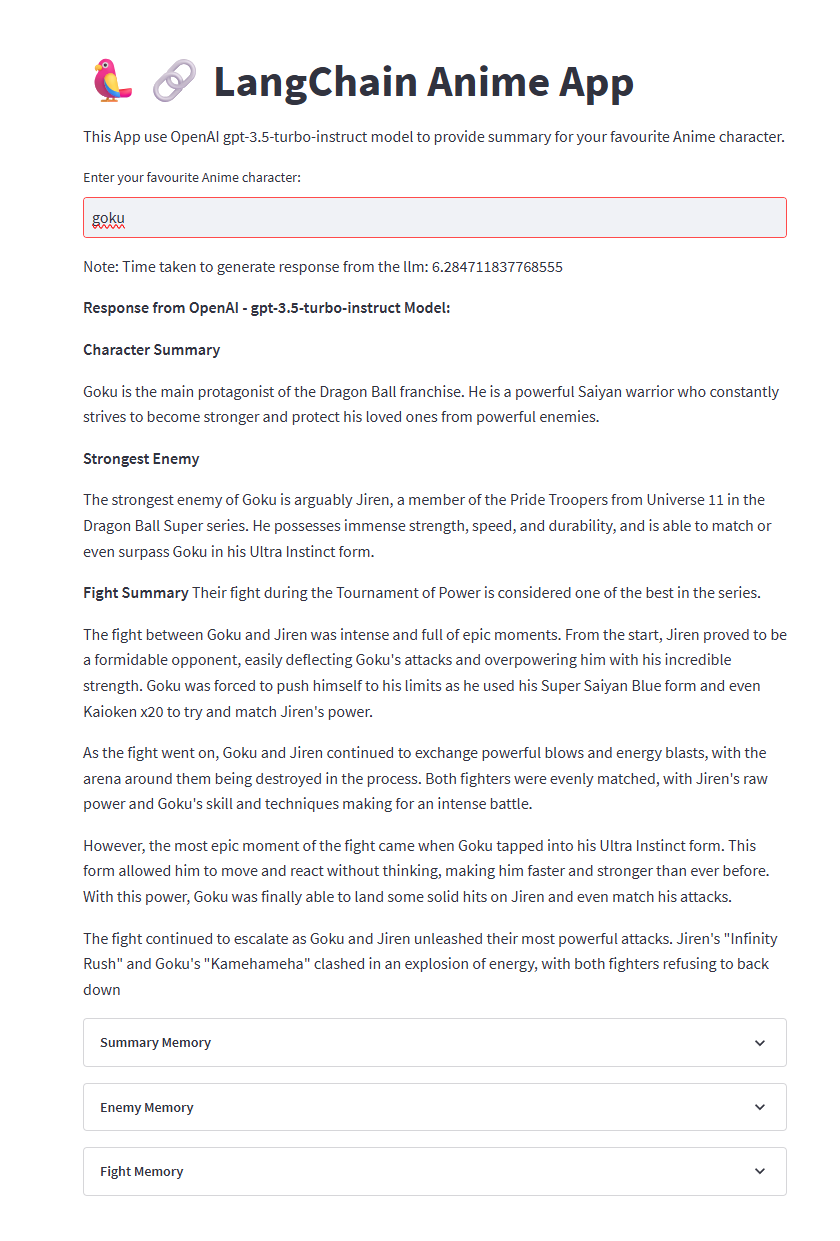